In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../heart.csv')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
6071,62,0,2,130,263,0,0,97,0,1.2,1,1,2,1
6072,58,0,3,100,248,0,2,122,0,1.0,1,0,0,0
6073,59,1,3,138,271,0,2,182,0,0.0,0,0,0,0
6074,56,1,3,130,283,1,2,103,1,1.6,2,0,2,1
6075,50,1,3,150,243,0,2,128,0,2.6,1,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6076 entries, 0 to 6075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       6076 non-null   int64  
 1   sex       6076 non-null   int64  
 2   cp        6076 non-null   int64  
 3   trestbps  6076 non-null   int64  
 4   chol      6076 non-null   int64  
 5   fbs       6076 non-null   int64  
 6   restecg   6076 non-null   int64  
 7   thalach   6076 non-null   int64  
 8   exang     6076 non-null   int64  
 9   oldpeak   6076 non-null   float64
 10  slope     6076 non-null   int64  
 11  ca        6076 non-null   int64  
 12  thal      6076 non-null   int64  
 13  target    6076 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 664.7 KB


## Split Data

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold

# Pisahkan fitur dan target
X = data.drop(columns=['target'])
y = data['target']

# Inisialisasi k-fold cross-validation
kf = KFold(n_splits=30, shuffle=True, random_state=42)

## Naïve Bayes

In [8]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import LabelEncoder
import pickle

# List untuk menampung hasil tiap fold
accuracies_nb = []
log_losses_nb = []
f1_scores_nb = []
precisions_nb = []
recalls_nb = []

# Loop k-fold
for train_index_nb, test_index_nb in kf.split(X):
    # Split data
    X_train_nb, X_test_nb = X.iloc[train_index_nb], X.iloc[test_index_nb]
    y_train_nb, y_test_nb = y.iloc[train_index_nb], y.iloc[test_index_nb]

    # Normalisasi fitur numerik (fit di train, transform di test)
    scaler = StandardScaler()
    X_train_nb = scaler.fit_transform(X_train_nb)
    X_test_nb = scaler.transform(X_test_nb)

    # Model Naïve Bayes
    model_nb = GaussianNB()
    model_nb.fit(X_train_nb, y_train_nb)

    # Prediksi
    y_pred_nb = model_nb.predict(X_test_nb)
    y_proba_nb = model_nb.predict_proba(X_test_nb)

    # Evaluasi
    accuracies_nb.append(accuracy_score(y_test_nb, y_pred_nb))
    log_losses_nb.append(log_loss(y_test_nb, y_proba_nb))
    f1_scores_nb.append(f1_score(y_test_nb, y_pred_nb, average='weighted'))
    precisions_nb.append(precision_score(y_test_nb, y_pred_nb, average='weighted'))
    recalls_nb.append(recall_score(y_test_nb, y_pred_nb, average='weighted'))
    
# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies_nb):.4f}")
print(f"Log Loss: {np.mean(log_losses_nb):.4f}")
print(f"F1-Score: {np.mean(f1_scores_nb):.4f}")
print(f"Precision: {np.mean(precisions_nb):.4f}")
print(f"Recall: {np.mean(recalls_nb):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_naive_bayes.pkl', 'wb') as model_file:
    pickle.dump(model_nb, model_file)

# Simpan scaler untuk normalisasi data baru nantinya
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

Accuracy: 0.7143
Log Loss: 0.5786
F1-Score: 0.7143
Precision: 0.7167
Recall: 0.7143


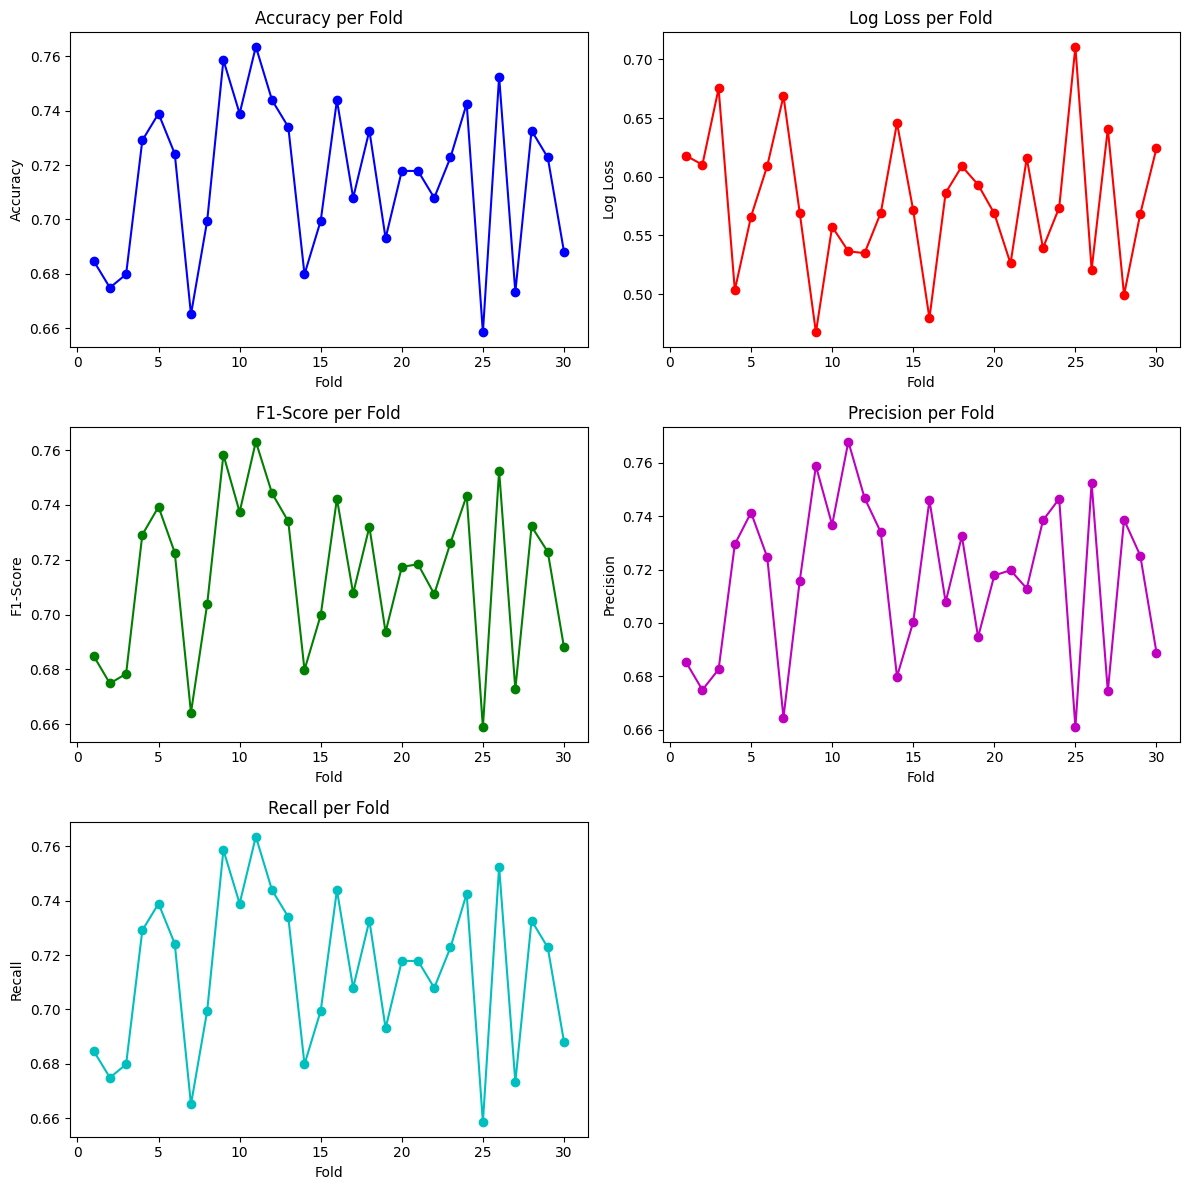


Average Accuracy: 0.7143
Average Log Loss: 0.5786
Average F1-Score: 0.7143
Average Precision: 0.7167
Average Recall: 0.7143


In [9]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_nb, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_nb, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_nb, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_nb, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_nb, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_nb):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_nb):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_nb):.4f}")
print(f"Average Precision: {np.mean(precisions_nb):.4f}")
print(f"Average Recall: {np.mean(recalls_nb):.4f}")

In [10]:
from sklearn.metrics import confusion_matrix

y_pred_nb = model_nb.predict(X_test_nb)
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

print("Confusion Matrix:")
print(cm_nb)

TP_nb = cm_nb[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN_nb = cm_nb[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP_nb = cm_nb[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN_nb = cm_nb[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP_nb}, TN: {TN_nb}, FP: {FP_nb}, FN: {FN_nb}")

Confusion Matrix:
[[69 34]
 [29 70]]
TP: 70, TN: 69, FP: 34, FN: 29


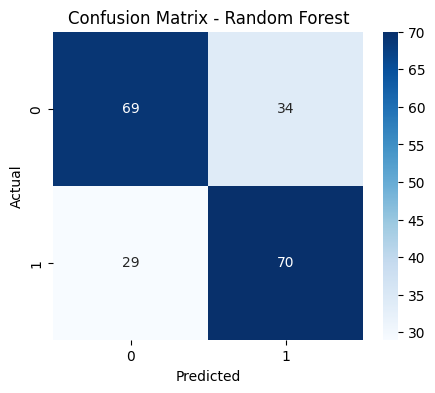

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Contoh untuk Random Forest
cm_nb = confusion_matrix(y_test_nb, model_nb.predict(X_test_nb))
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

# List untuk menampung hasil tiap fold
accuracies_rf = []
log_losses_rf = []
f1_scores_rf = []
precisions_rf = []
recalls_rf = []

# Looping k-fold cross-validation
for train_index_rf, test_index_rf in kf.split(X):
    X_train_rf, X_test_rf = X.iloc[train_index_rf], X.iloc[test_index_rf]
    y_train_rf, y_test_rf = y.iloc[train_index_rf], y.iloc[test_index_rf]

    # Inisialisasi model Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Latih model
    model_rf.fit(X_train_rf, y_train_rf)

    # Prediksi
    y_pred_rf = model_rf.predict(X_test_rf)
    y_pred_proba_rf = model_rf.predict_proba(X_test_rf)

    # Evaluasi
    accuracies_rf.append(accuracy_score(y_test_rf, y_pred_rf))
    log_losses_rf.append(log_loss(y_test_rf, y_pred_proba_rf))
    f1_scores_rf.append(f1_score(y_test_rf, y_pred_rf, average='weighted'))
    precisions_rf.append(precision_score(y_test_rf, y_pred_rf, average='weighted'))
    recalls_rf.append(recall_score(y_test_rf, y_pred_rf, average='weighted'))

# Tampilkan hasil rata-rata
print(f"Accuracy: {np.mean(accuracies_rf):.4f}")
print(f"Log Loss: {np.mean(log_losses_rf):.4f}")
print(f"F1-Score: {np.mean(f1_scores_rf):.4f}")
print(f"Precision: {np.mean(precisions_rf):.4f}")
print(f"Recall: {np.mean(recalls_rf):.4f}")

# Simpan model terakhir (dari fold terakhir)
with open('model_random_forest.pkl', 'wb') as model_file:
    pickle.dump(model_rf, model_file)

Accuracy: 0.9640
Log Loss: 0.0909
F1-Score: 0.9640
Precision: 0.9644
Recall: 0.9640


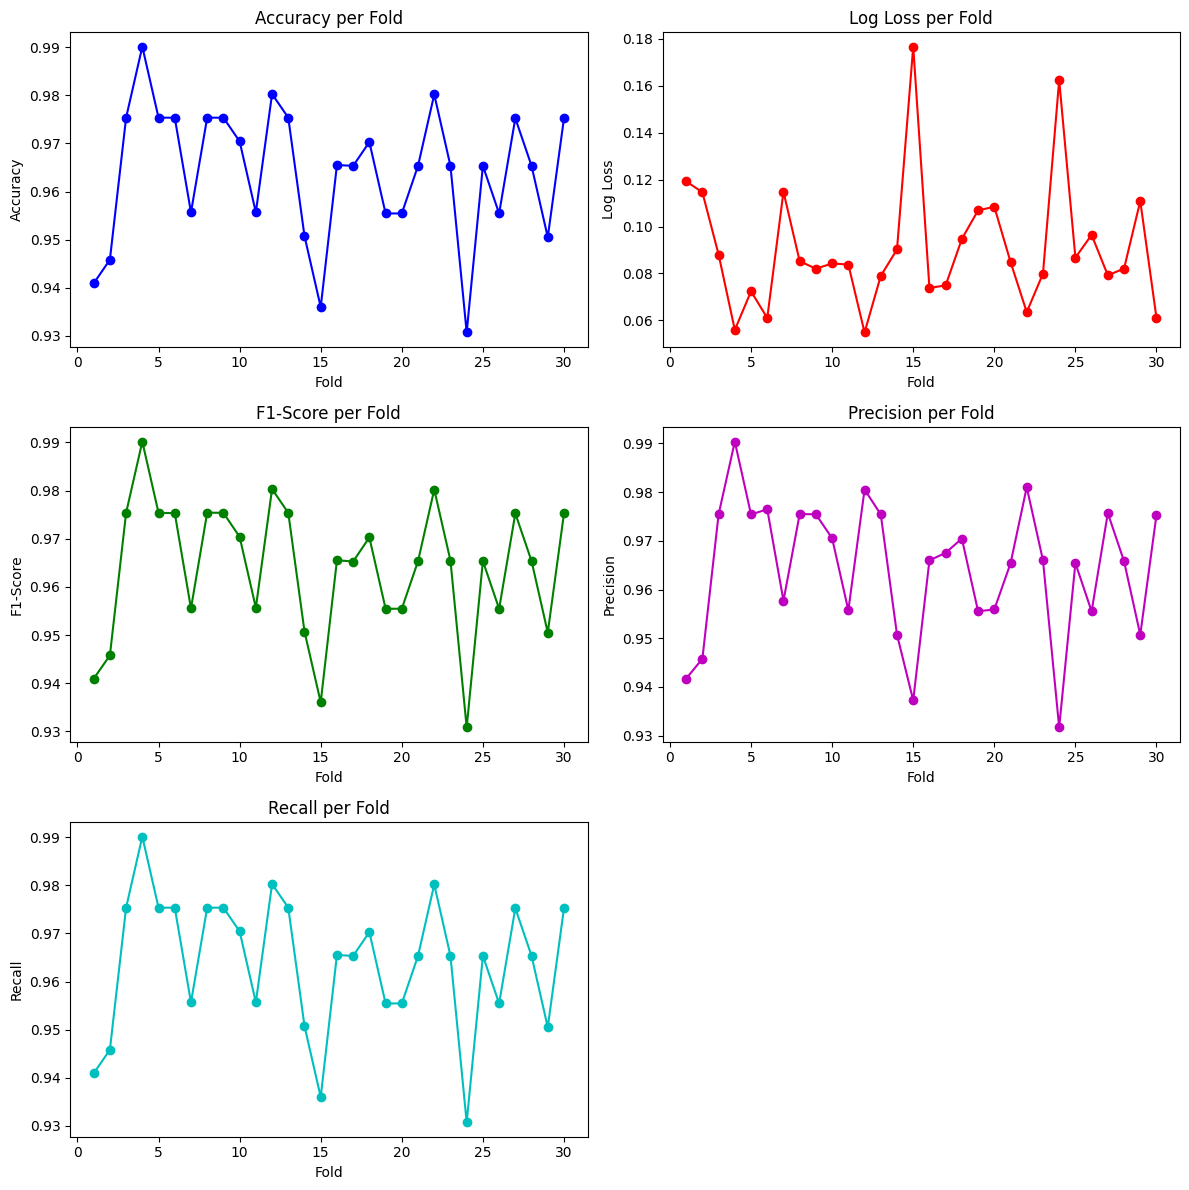


Average Accuracy: 0.9640
Average Log Loss: 0.0909
Average F1-Score: 0.9640
Average Precision: 0.9644
Average Recall: 0.9640


In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes[0, 0].plot(range(1, kf.get_n_splits() + 1), accuracies_rf, marker='o', linestyle='-', color='b')
axes[0, 0].set_title("Accuracy per Fold")
axes[0, 0].set_xlabel("Fold")
axes[0, 0].set_ylabel("Accuracy")

axes[0, 1].plot(range(1, kf.get_n_splits() + 1), log_losses_rf, marker='o', linestyle='-', color='r')
axes[0, 1].set_title("Log Loss per Fold")
axes[0, 1].set_xlabel("Fold")
axes[0, 1].set_ylabel("Log Loss")

axes[1, 0].plot(range(1, kf.get_n_splits() + 1), f1_scores_rf, marker='o', linestyle='-', color='g')
axes[1, 0].set_title("F1-Score per Fold")
axes[1, 0].set_xlabel("Fold")
axes[1, 0].set_ylabel("F1-Score")

axes[1, 1].plot(range(1, kf.get_n_splits() + 1), precisions_rf, marker='o', linestyle='-', color='m')
axes[1, 1].set_title("Precision per Fold")
axes[1, 1].set_xlabel("Fold")
axes[1, 1].set_ylabel("Precision")

axes[2, 0].plot(range(1, kf.get_n_splits() + 1), recalls_rf, marker='o', linestyle='-', color='c')
axes[2, 0].set_title("Recall per Fold")
axes[2, 0].set_xlabel("Fold")
axes[2, 0].set_ylabel("Recall")

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"\nAverage Accuracy: {np.mean(accuracies_rf):.4f}")
print(f"Average Log Loss: {np.mean(log_losses_rf):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores_rf):.4f}")
print(f"Average Precision: {np.mean(precisions_rf):.4f}")
print(f"Average Recall: {np.mean(recalls_rf):.4f}")

In [13]:
from sklearn.metrics import confusion_matrix


y_pred_rf = model_rf.predict(X_test_rf)

# Bikin Confusion Matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)

print("Confusion Matrix:")
print(cm_rf)


TP_rf = cm_rf[1, 1]  # True Positive (Prediksi 1, sebenarnya 1)
TN_rf = cm_rf[0, 0]  # True Negative (Prediksi 0, sebenarnya 0)
FP_rf = cm_rf[0, 1]  # False Positive (Prediksi 1, sebenarnya 0)
FN_rf = cm_rf[1, 0]  # False Negative (Prediksi 0, sebenarnya 1)

print(f"TP: {TP_rf}, TN: {TN_rf}, FP: {FP_rf}, FN: {FN_rf}")

Confusion Matrix:
[[101   2]
 [  3  96]]
TP: 96, TN: 101, FP: 2, FN: 3


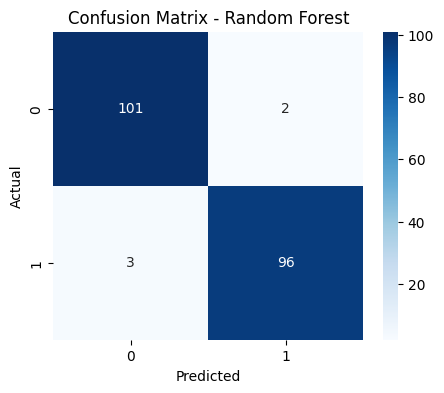

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test_rf, model_rf.predict(X_test_rf))
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Predict


In [15]:
data_baru1 = np.array([[63, 1, 0, 145, 233, 1, 2, 150, 0, 2.3, 2, 0, 1]])

# Naïve Bayes
data_baru_scaled1 = scaler.transform(data_baru1)
prediksi_nb = model_nb.predict(data_baru_scaled1)

if prediksi_nb[0] == 1:
    print("Naïve Bayes: Berisiko Penyakit Jantung")
else:
    print("Naïve Bayes: Tidak Berisiko Penyakit Jantung")

# Random Forest
prediksi_rf = model_rf.predict(data_baru1)  

if prediksi_rf[0] == 1:
    print("Random Forest: Berisiko Penyakit Jantung")
else:
    print("Random Forest: Tidak Berisiko Penyakit Jantung")

Naïve Bayes: Tidak Berisiko Penyakit Jantung
Random Forest: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
print("Probabilitas NB:", model_nb.predict_proba(data_baru_scaled1))
print("Probabilitas RF:", model_rf.predict_proba(data_baru1))

Probabilitas NB: [[0.55423477 0.44576523]]
Probabilitas RF: [[0.99 0.01]]


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [17]:
data_baru2 = np.array([[54, 0, 2, 110, 214, 0, 1, 158, 0, 1.6, 1, 0, 2]]) 

# Naïve Bayes
data_baru_scaled2 = scaler.transform(data_baru2)
prediksi_nb = model_nb.predict(data_baru_scaled2)

if prediksi_nb[0] == 1:
    print("Naïve Bayes: Berisiko Penyakit Jantung")
else:
    print("Naïve Bayes: Tidak Berisiko Penyakit Jantung")

# Random Forest
prediksi_rf = model_rf.predict(data_baru2)  

if prediksi_rf[0] == 1:
    print("Random Forest: Berisiko Penyakit Jantung")
else:
    print("Random Forest: Tidak Berisiko Penyakit Jantung")

Naïve Bayes: Berisiko Penyakit Jantung
Random Forest: Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
print("Probabilitas NB:", model_nb.predict_proba(data_baru_scaled2))
print("Probabilitas RF:", model_rf.predict_proba(data_baru2))

Probabilitas NB: [[0.09798726 0.90201274]]
Probabilitas RF: [[0. 1.]]


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
data_baru3 = np.array([[59, 1, 1, 140, 221, 0, 1, 164, 1, 0.0, 2, 0, 2]]) 

# Naïve Bayes
data_baru_scaled3 = scaler.transform(data_baru3)
prediksi_nb = model_nb.predict(data_baru_scaled3)

if prediksi_nb[0] == 1:
    print("Naïve Bayes: Berisiko Penyakit Jantung")
else:
    print("Naïve Bayes: Tidak Berisiko Penyakit Jantung")

# Random Forest
prediksi_rf = model_rf.predict(data_baru3)  

if prediksi_rf[0] == 1:
    print("Random Forest: Berisiko Penyakit Jantung")
else:
    print("Random Forest: Tidak Berisiko Penyakit Jantung")

Naïve Bayes: Berisiko Penyakit Jantung
Random Forest: Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
print("Probabilitas NB:", model_nb.predict_proba(data_baru_scaled3))
print("Probabilitas RF:", model_rf.predict_proba(data_baru3))

Probabilitas NB: [[0.25627473 0.74372527]]
Probabilitas RF: [[0. 1.]]


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:
data_baru4 = np.array([[58, 1, 1, 120, 284, 0, 0, 160, 0, 1.8, 1, 0, 2]]) 

# Naïve Bayes
data_baru_scaled4 = scaler.transform(data_baru4)
prediksi_nb = model_nb.predict(data_baru_scaled4)

if prediksi_nb[0] == 1:
    print("Naïve Bayes: Berisiko Penyakit Jantung")
else:
    print("Naïve Bayes: Tidak Berisiko Penyakit Jantung")

# Random Forest
prediksi_rf = model_rf.predict(data_baru4)  

if prediksi_rf[0] == 1:
    print("Random Forest: Berisiko Penyakit Jantung")
else:
    print("Random Forest: Tidak Berisiko Penyakit Jantung")

Naïve Bayes: Berisiko Penyakit Jantung
Random Forest: Tidak Berisiko Penyakit Jantung


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
print("Probabilitas NB:", model_nb.predict_proba(data_baru_scaled4))
print("Probabilitas RF:", model_rf.predict_proba(data_baru4))

Probabilitas NB: [[0.4635417 0.5364583]]
Probabilitas RF: [[1. 0.]]


C:\Users\UMMY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# Rata-rata per fitur per kelas
print("Mean per kelas:\n", model_nb.theta_)

Mean per kelas:
 [[ 0.07618206  0.14089858 -0.26190398  0.06066575  0.04874514  0.01126149
  -0.11293489 -0.21222234  0.21452463  0.19031935 -0.33806891  0.13660519
  -0.02165455]
 [-0.08490269 -0.15702736  0.29188435 -0.06761021 -0.05432504 -0.0125506
   0.12586264  0.23651561 -0.23908145 -0.21210537  0.37676794 -0.1522425
   0.02413336]]


In [24]:
importances = model_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.4f}")

age: 0.0877
sex: 0.0296
cp: 0.1316
trestbps: 0.0831
chol: 0.0931
fbs: 0.0119
restecg: 0.0757
thalach: 0.1158
exang: 0.0289
oldpeak: 0.0817
slope: 0.1131
ca: 0.0652
thal: 0.0827


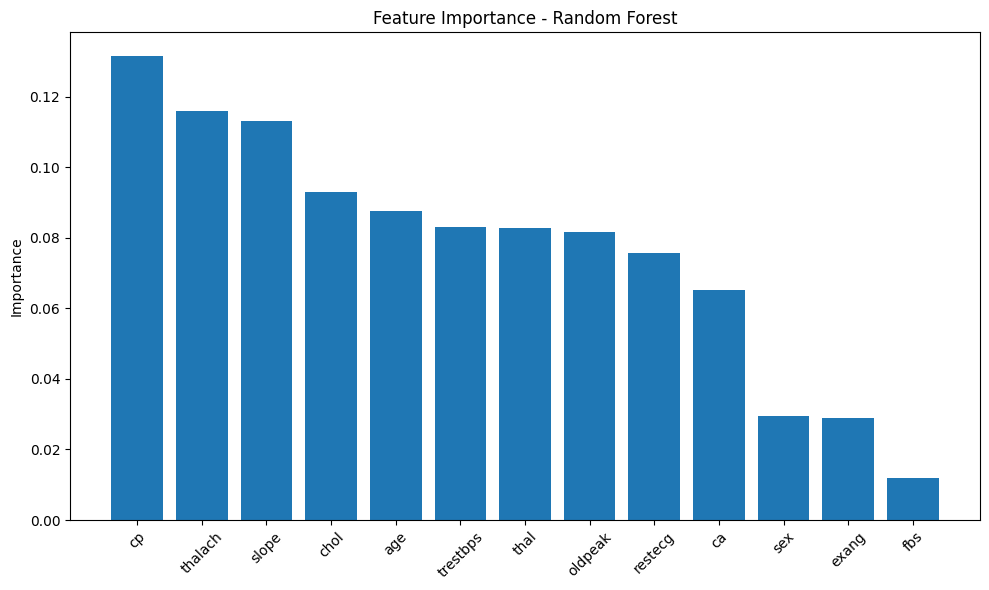

In [26]:
import numpy as np

feature_names = X.columns
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
